<a href="https://colab.research.google.com/github/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/PI_4_Predicao_Valores_Imoveis_SJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas
%pip install matplotlib

In [ ]:
%pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<hr>

# 1) Identificação e Tratamento Inicial dos Dados

### <li>Carregando dados, com o preço de aluguéis e características dos imóveis, do arquivo "listings.zip":

In [ ]:
url_dados = 'https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/dados/new-listings.zip?raw=true'
dados = pd.read_csv(url_dados,compression='zip')

### <li>Visualizando todas as colunas para identificar todos os atributos disponíveis e a possibilidade de filtrá-los.

In [8]:
pd.set_option('display.max_columns',None)
display(dados)

,id,resource_id,provider_id,advertiser_id,address_country,address_state,address_city,address_neighborhood,address_street_number,address_street,address_unit_number,address_zipcode,latitude,longitude,title,description,unit_type,amenities,bathrooms,bedrooms,suites,parking_spaces,total_area,usable_area,price,price_monthly_condo_fee,price_rental_total,price_yearly_iptu,publication_type,listing_status,listing_type,created_at,updated_at,raw_data,scraped_at
0,923833,2539419421,61529.0,8132d7f5-ac6e-8229-ac29-66e53d55fe1e,BR,São Paulo,São José dos Campos,Jardim das Indústrias,NaN,NaN,NaN,12241200.0,NaN,NaN,Excelente apartamento para alugar de 2 dormitó...,Excelente Apartamento no Splendor Garden - Jd....,0,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""SERVIC...",2,2,0,2.0,100,0,3000,482,0,155,STANDARD,NaN,USED,2021-10-28 01:43:54.123+00,2021-10-28 01:43:56.883+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-10-28 05:07:15.43542+00
1,1336880,2549894537,10048.0,5edc5203-b48b-1278-0e4b-36b4bf556daf,BR,São Paulo,São José dos Campos,Jardim América,NaN,Rua Andorra,NaN,12235050.0,NaN,NaN,Apartamento locação Jardim América!!! Spazio C...,Apartamento no Jardim América - Localização es...,0,[],2,3,1,1.0,64,0,1800,290,0,0,STANDARD,NaN,USED,2022-02-01 19:01:11.276+00,2022-02-01 19:01:21.341+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-02-02 05:08:59.620765+00
2,1134517,2546641936,60384.0,ef34904e-bd8d-66bd-cd90-e3f966a6bf3b,BR,São Paulo,São José dos Campos,Jardim São Dimas,NaN,Avenida Doutor Adhemar de Barros,NaN,12245011.0,NaN,NaN,Apartamento Vila Adyana em frente ao Parque Sa...,"118 m2, <br>3 quartos, sendo 1 suíte, <br>Sala...",0,"[""POOL"", ""BARBECUE_GRILL""]",3,3,1,1.0,118,0,2500,750,0,0,STANDARD,NaN,USED,2022-01-04 07:22:09.019+00,2022-01-28 11:21:26.848+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-01-05 05:07:37.423878+00
3,1107421,2546130088,NaN,5c45578a-2454-7af7-162e-b80754623bbb,BR,São Paulo,São José dos Campos,Jardim Satélite,NaN,Rua Polar,NaN,12230240.0,NaN,NaN,Apartamento para aluguel tem 48 metros quadrad...,Conheça as características deste lindo apartam...,0,[],1,2,0,1.0,0,0,950,238,0,0,STANDARD,NaN,USED,2021-12-27 20:52:57.74+00,2022-01-10 13:07:26.754+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-28 05:10:28.48205+00
4,1536013,2557422239,46200.0,1404e2f2-c083-a256-152f-81c087dacf2e,BR,São Paulo,São José dos Campos,Jardim Augusta,NaN,NaN,NaN,12216510.0,NaN,NaN,"Apartamento com 2 dormitórios para alugar, 63 ...",Apartamento no Citta Di Roma<br><br>Contendo:<...,0,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""GATED_...",1,2,1,1.0,63,0,1728,390,0,59,STANDARD,NaN,USED,2022-04-06 01:16:39.038+00,2022-04-06 01:19:49.16+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-04-06 05:06:23.146788+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60964,1072808,2545119128,63537.0,fae8f98b-2c16-bdef-d2b2-e611a3718473,BR,São Paulo,São José dos Campos,Jardim Oswaldo Cruz,22,Rua Siria,NaN,12216530.0,NaN,NaN,Apartamento Mobiliado próx. Center Vale,2 dormitórios com armários - 55m2<br>1 banheir...,0,"[""FURNISHED""]",1,2,0,1.0,55,0,2500,0,0,0,STANDARD,NaN,USED,2021-12-18 01:41:44.46+00,2021-12-24 01:52:36.69+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-18 05:20:19.721142+00
60965,1039824,2543951968,56902.0,8e0b76b5-76ce-cdc7-c9ea-74b9347f68cc,BR,São Paulo,São José dos Campos,Vila Tesouro,NaN,NaN,NaN,12221520.0,NaN,NaN,"LOCAÇÃO APARTAMENTO 2 DORMITÓRIOS, 1 VAGA- VIL...",Apartamento com 47 m2 <br><br>2 dormitórios<br...,0,"[""KITCHEN"", ""GARAGE"", ""GATED_COMMUNITY""]",1,2,0,1.0,47,0,750,250,0,35,STANDARD,NaN,USED,2021-12-08 14:27:38.954+00,2021-12-08 14:27:40.143+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-12-09 05:02:21.780106+00
60966,976422,2541504617,46200.0,1404e2f2-c0

### <li>Eliminando colunas que não serão úteis na análise dos dados.

In [9]:
dados_filtrados = dados.drop(columns=["id","resource_id","provider_id","advertiser_id","address_country","address_state","address_city","title","description","unit_type","amenities","usable_area","price_rental_total","publication_type","listing_status","listing_type","created_at","updated_at","raw_data","scraped_at","address_street_number","address_unit_number"])
display(dados_filtrados)

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
0,Jardim das Indústrias,NaN,12241200.0,NaN,NaN,2,2,0,2.0,100,3000,482,155
1,Jardim América,Rua Andorra,12235050.0,NaN,NaN,2,3,1,1.0,64,1800,290,0
2,Jardim São Dimas,Avenida Doutor Adhemar de Barros,12245011.0,NaN,NaN,3,3,1,1.0,118,2500,750,0
3,Jardim Satélite,Rua Polar,12230240.0,NaN,NaN,1,2,0,1.0,0,950,238,0
4,Jardim Augusta,NaN,12216510.0,NaN,NaN,1,2,1,1.0,63,1728,390,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60964,Jardim Oswaldo Cruz,Rua Siria,12216530.0,NaN,NaN,1,2,0,1.0,55,2500,0,0
60965,Vila Tesouro,NaN,12221520.0,NaN,NaN,1,2,0,1.0,47,750,250,35
60966,Jardim Esplanada II,NaN,12242840.0,NaN,NaN,6,4,4,3.0,190,8200,1050,242
60967,Jardim Alvorada,Avenida Cassiano Ricardo,12240540.0,NaN,NaN,5,3,3,3.0,157,4900,811,1800


### <li>Ordenando os imóveis pelo bairro, pela rua e número de quartos.

In [10]:
dados_filt_ord = dados_filtrados.sort_values(['address_neighborhood','address_street','bedrooms'])
dados_filt_ord

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
55389,Alto da Ponte,Avenida Rui Barbosa,12212531.0,NaN,NaN,1,1,0,0.0,45,880,0,0
24752,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12213900.0,NaN,NaN,1,2,0,1.0,62,1130,0,120
26841,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,0,1.0,62,900,400,43
60283,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,1,NaN,52,1100,0,0
5015,Alto da Ponte,NaN,12212510.0,NaN,NaN,1,2,0,1.0,54,600,373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57205,Vila das Flores,Rua Maria Pires da Silva,12234758.0,NaN,NaN,1,2,0,1.0,64,1100,100,0
21274,Área Rural de Caçapava,NaN,12299899.0,NaN,NaN,1,2,0,1.0,140,980,240,50
43237,NaN,NaN,12250000.0,NaN,NaN,1,2,0,1.0,52,700,255,0
45120,NaN,NaN,12250000.0,NaN,NaN,1,2,0,1.0,52,648,321,0


<hr>

# 2) Entendimento e Organização dos Dados

### <li>Histograma para entender o nº de quartos dos imóveis na amostra:

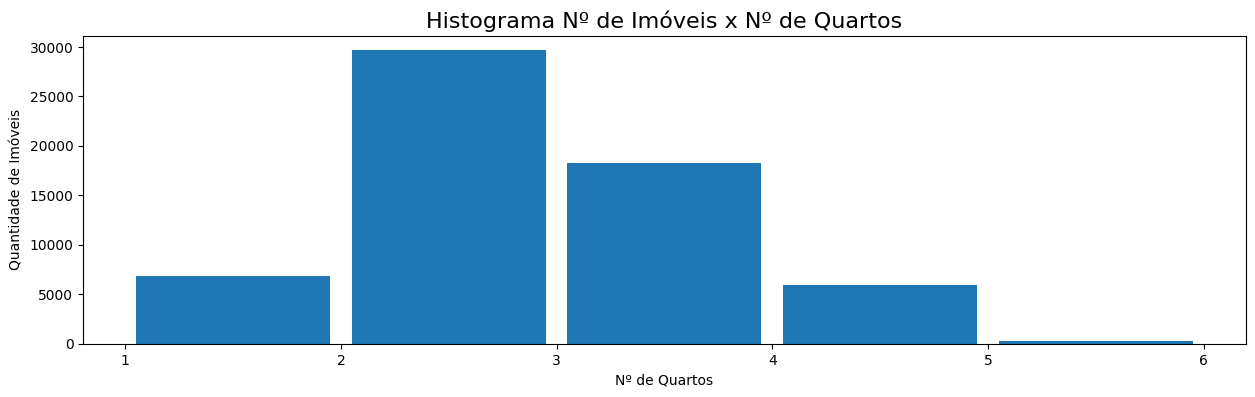

In [13]:
quartos = dados_filt_ord['bedrooms']

plt.figure(figsize=(15,4))
plt.hist(quartos,rwidth=0.9 , bins = range(1,7,1))
plt.title('Histograma Nº de Imóveis x Nº de Quartos', fontsize=16)
plt.xlabel('Nº de Quartos')
plt.ylabel('Quantidade de Imóveis')
plt.show()


### <li>Exibindo a quantidade de imóveis para cada número de quartos na amostra:

In [18]:
# Mostra qual a quantidade de quartos nos imóveis do conjunto de dados.
dados_bed = dados_filt_ord.sort_values(['bedrooms'])
dados_bed['bedrooms'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 16, 17, 19, 20],
      dtype=int64)

In [19]:
# Mostra nº de quartos x nº de imóveis na amostra.
dados_bed['bedrooms'].value_counts()

bedrooms
2     29650
3     18264
1      6859
4      5957
5       210
6        17
10        4
7         2
8         1
9         1
16        1
17        1
19        1
20        1
Name: count, dtype: int64

<b>OBS.:</b> Nota-se que podemos desconsiderar imóveis com mais de 5 dormitórios por não serem em uma quantidade representativa no conjunto de dados.

### <li>Removendo os imóveis com mais de 5 quartos do dataframe:

In [20]:
filtro_bedrooms = dados_bed['bedrooms'] < 6
dados_bed_filt = dados_bed[filtro_bedrooms]
dados_bed_filt['bedrooms'].value_counts()

bedrooms
2    29650
3    18264
1     6859
4     5957
5      210
Name: count, dtype: int64

### <li>Contando a quantidade de imóveis em cada bairro:

In [21]:
dados_bairros = dados_bed_filt['address_neighborhood'].value_counts()
dados_bairros

address_neighborhood
Parque Residencial Aquarius     11990
Vila Ema                         2920
Jardim Esplanada                 2744
Jardim Satélite                  2714
Jardim das Indústrias            2649
                                ...  
Loteamento Villa Branca             1
Loteamento Portal Santa Inês        1
Parque Interlagos                   1
Jardim America                      1
Portal dos Passaros                 1
Name: count, Length: 206, dtype: int64

<b>OBS.:</b> Aparentemente, em alguns bairros não há amostras suficientes para concluir sobre o valor dos aluguéis.

### <li>Investigando quais bairros possuem menos de 10 amostras no dataframe:

In [22]:
filtro_bairros = dados_bed_filt['address_neighborhood'].value_counts() > 10
filtro_bairros.value_counts()

count
True     129
False     77
Name: count, dtype: int64

<b>OBS.:</b> Observa-se que 77 bairros possuem menos de 10 amostras no dataframe, restando 129 com 10 ou mais amostras.

In [24]:
display(filtro_bairros)

address_neighborhood
Parque Residencial Aquarius      True
Vila Ema                         True
Jardim Esplanada                 True
Jardim Satélite                  True
Jardim das Indústrias            True
                                ...  
Loteamento Villa Branca         False
Loteamento Portal Santa Inês    False
Parque Interlagos               False
Jardim America                  False
Portal dos Passaros             False
Name: count, Length: 206, dtype: bool

In [25]:
# Criando um dataframe com os dados sobre a quantidade de amostras > 10 (True) ou não (False).
dados_bairros_filt = pd.DataFrame({"maior que 10":filtro_bairros})
dados_bairros_filt['bairros'] = dados_bairros_filt.index

# Exibindo os 50 últimos bairros com amostras em quantidade < 10.
dados_bairros_filt.index = range(206)
dados_bairros_filt = dados_bairros_filt[['bairros','maior que 10']]
dados_bairros_filt.tail(50)

,bairros,maior que 10
156,Jardim Altos de Santana,False
157,Urbanova VII,False
158,Jardim Santa Maria,False
159,Loteamento Tom Jobim,False
160,Parque dos Ipês,False
161,Parque Martim Cererê,False
162,Vila Nova Conceição,False
163,Putim,False
164,Residencial São Francisco,False
165,Jardim Residencial Golden Park,False


<b>OBS.:</b> Nota-se que alguns bairros foram nomeados de formas diferentes, ocupando mais de uma linha, como por exemplo:
 *   Urbanova III, Urbanova IV e Condomínio Residencial Alphaville I = Urbanova;
 *   Jardim Aquarius = Parque Residencial Aquarius

In [26]:
# Exibindo as várias denominações para o bairro Urbanova na amostra. 
dados_bairros_filt2 = dados_bairros_filt[dados_bairros_filt['bairros'].str.contains('Urbanova')]
display(dados_bairros_filt2)

,bairros,maior que 10
19,Urbanova,True
26,Urbanova V,True
44,Urbanova VI,True
45,Loteamento Urbanova II,True
78,Urbanova I,True
157,Urbanova VII,False
168,Urbanova III,False
172,Urbanova IV-A,False


In [27]:
#Exibindo as denominações do bairro Parque Residencial Aquarius.
dados_bairros_filt3 = dados_bairros_filt[dados_bairros_filt['bairros'].str.contains('Aquarius')]
display(dados_bairros_filt3)

,bairros,maior que 10
0,Parque Residencial Aquarius,True
175,Jardim Aquarius,False


<b>OBS.:</b> Concluindo que não será possível utilizar os nomes dos bairros como parâmetros para ferramentas de Machine Learning, decidindo encontrar as coordenadas geográficas como parâmetros para melhor representar a localização de cada imóvel.

In [32]:
# Com a função info() abaixo, foi possível observar:
# Há muitos valores NaN para os nomes de ruas. Logo, essa coluna poderá ser eliminada.
# Há 1045 imóveis com valores NaN para o número de vagas de carro. Talvez possamos considerar como zero o número de vagas nesses casos, a investigar a seguir.
# Há apenas 2 imóveis com NaN como valor de CEP. Caso haja nome da rua, poderemos inserir esses valores manualmente.
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60940 entries, 55389 to 21664
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_neighborhood     60937 non-null  object 
 1   address_street           30435 non-null  object 
 2   address_zipcode          60938 non-null  float64
 3   latitude                 0 non-null      float64
 4   longitude                0 non-null      float64
 5   bathrooms                60940 non-null  int64  
 6   bedrooms                 60940 non-null  int64  
 7   suites                   60940 non-null  int64  
 8   parking_spaces           59895 non-null  float64
 9   total_area               60940 non-null  int64  
 10  price                    60940 non-null  int64  
 11  price_monthly_condo_fee  60940 non-null  int64  
 12  price_yearly_iptu        60940 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 6.5+ MB


In [43]:
# Exibindo as linhas com valores de CEP nulos ou NaN.
display(dados_bed_filt[dados_bed_filt['address_zipcode'] == 0])
display(dados_bed_filt[dados_bed_filt['address_zipcode'].isnull()])
# Exibindo a quantidade de NaN para cada coluna.
dados_bed_filt.isnull().sum()

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
40533,Jardim Telespark,NaN,0.0,NaN,NaN,1,2,0,0.0,53,700,280,30
42264,Parque Industrial,Rua Teresina,0.0,NaN,NaN,2,2,1,1.0,65,1150,408,59
45781,Jardim Aquarius,NaN,0.0,NaN,NaN,3,3,3,2.0,96,3520,750,120
40283,Jardim Aquarius,NaN,0.0,NaN,NaN,1,3,0,2.0,90,1500,659,95


,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
46407,Parque Industrial,Rua Icatu,NaN,NaN,NaN,2,2,1,NaN,68,1000,270,0
43812,NaN,NaN,NaN,NaN,NaN,2,3,1,2.0,70,1650,585,0


address_neighborhood           3
address_street             30505
address_zipcode                2
latitude                   60940
longitude                  60940
bathrooms                      0
bedrooms                       0
suites                         0
parking_spaces              1045
total_area                     0
price                          0
price_monthly_condo_fee        0
price_yearly_iptu              0
dtype: int64

<b>OBS.:</b>
     <li>Foi possível encontrar os CEPs das Ruas Icatu e Teresina no Parque Industrial, 12237-010 e 12235-610, respectivamente.
     <li>Nota-se que podemos eliminar a linha 43812, pois não nenhuma informação de endereço ou CEP.

### <li>Importando dataframe com relação CEPs x Latitude e Longitude:

In [32]:
url_cep2018 = pd.read_csv('https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/raw/main/dados/ceps_coord_2018.zip', compression='zip',encoding='latin')
display(url_cep2018)

,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo
0,1001000,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado ímpar,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado impar,NaN,-23.550278,-46.634218,3550308,1521.110,11,S
1,1001001,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado par,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado par,NaN,-23.549865,-46.634020,3550308,1521.110,11,S
2,1001010,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Sé,São Paulo,SP,NaN,NaN,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Se,Sao Paulo,NaN,NaN,-23.551479,-46.633272,3550308,1521.110,11,S
3,1001900,Praça,"da Sé, 108","Praça da Sé, 108",Sé,São Paulo,SP,NaN,UNESP - Universidade Estadual Júlio de Mesquit...,Praca,"da Se, 108","Praca da Se, 108",Se,Sao Paulo,NaN,UNESP - Universidade Estadual Julio de Mesquit...,-23.549896,-46.634378,3550308,1521.110,11,S
4,1001901,Praça,"da Sé, 371","Praça da Sé, 371",Sé,São Paulo,SP,NaN,Edifício Santa Lídia,Praca,"da Se, 371","Praca da Se, 371",Se,Sao Paulo,NaN,Edificio Santa Lidia,-23.551829,-46.634234,3550308,1521.110,11,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108500,99980000,NaN,NaN,NaN,NaN,David Canabarro,RS,NaN,NaN,NaN,NaN,NaN,NaN,David Canabarro,NaN,NaN,-28.411418,-51.831144,4306304,174.939,54,S
1108501,99980970,Rua,"Adelino Gazzoni, 160","Rua Adelino Gazzoni, 160",Centro,David Canabarro,RS,NaN,NaN,Rua,"Adelino Gazzoni, 160","Rua Adelino Gazzoni, 160",Centro,David Canabarro,NaN,NaN,-28.387671,-51.846788,4306304,174.939,54,S
1108502,99980974,Distrito,"Capela São José do Capingui, s/n","Distrito Capela São José do Capingui, s/n",Capela São José do Capingui (Distrito),David Canabarro,RS,NaN,NaN,Distrito,"Capela Sao Jose do Capingui, s/n","Distrito Capela Sao Jose do Capingui, s/n",Capela Sao Jose do Capingui (Distrito),David Canabarro,NaN,NaN,-28.451355,-51.880714,4306304,174.939,54,S
1108503,99990000,NaN,NaN,NaN,NaN,Muliterno,RS,NaN,NaN,NaN,NaN,NaN,NaN,Muliterno,NaN,NaN,-28.343913,-51.746695,4312625,111.132,54,S


##Extraindo apenas os CEPs de São José dos Campos

In [35]:
#código IBGE de São José dos Campos = 3549904
filtro_ceps = url_cep2018['cidade_ibge'] == 3549904
url_cep2018 = url_cep2018[filtro_ceps]

In [41]:
display(url_cep2018)

,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo
127622,12209000,Avenida,Rui Barbosa,Avenida Rui Barbosa,Jardim Bela Vista,São José dos Campos,SP,até 614/615,NaN,Avenida,Rui Barbosa,Avenida Rui Barbosa,Jardim Bela Vista,Sao Jose dos Campos,ate 614/615,NaN,-23.178073,-45.888701,3549904,1099.409,12,S
127623,12209002,Avenida,Marechal Castelo Branco,Avenida Marechal Castelo Branco,Jardim Bela Vista,São José dos Campos,SP,NaN,NaN,Avenida,Marechal Castelo Branco,Avenida Marechal Castelo Branco,Jardim Bela Vista,Sao Jose dos Campos,NaN,NaN,-23.177065,-45.886526,3549904,1099.409,12,S
127624,12209003,Rua,Capitão Roberto Ferreira Maldos,Rua Capitão Roberto Ferreira Maldos,Jardim Bela Vista,São José dos Campos,SP,NaN,NaN,Rua,Capitao Roberto Ferreira Maldos,Rua Capitao Roberto Ferreira Maldos,Jardim Bela Vista,Sao Jose dos Campos,NaN,NaN,-23.178079,-45.885866,3549904,1099.409,12,S
127625,12209004,Avenida,Doutor Mário Galvão,Avenida Doutor Mário Galvão,Jardim Bela Vista,São José dos Campos,SP,NaN,NaN,Avenida,Doutor Mario Galvao,Avenida Doutor Mario Galvao,Jardim Bela Vista,Sao Jose dos Campos,NaN,NaN,-23.177203,-45.885419,3549904,1099.409,12,S
127626,12209005,Rua,Romeu Carnevalli,Rua Romeu Carnevalli,Jardim Bela Vista,São José dos Campos,SP,NaN,NaN,Rua,Romeu Carnevalli,Rua Romeu Carnevalli,Jardim Bela Vista,Sao Jose dos Campos,NaN,NaN,-23.179309,-45.886465,3549904,1099.409,12,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132781,12248712,Rua,das Tâmaras,Rua das Tâmaras,Residencial Frei Galvão,São José dos Campos,SP,NaN,NaN,Rua,das Tamaras,Rua das Tamaras,Residencial Frei Galvao,Sao Jose dos Campos,NaN,NaN,-23.167663,-45.787973,3549904,1099.409,12,S
132782,12248899,Área,Rural,Área Rural,Área Rural de São José dos Campos,São José dos Campos,SP,NaN,NaN,Area,Rural,Area Rural,Area Rural de Sao Jose dos Campos,Sao Jose dos Campos,NaN,NaN,-23.150912,-45.904347,3549904,1099.409,12,S
132783,12249000,NaN,NaN,NaN,NaN,São Francisco Xavier (São José dos Campos),SP,NaN,NaN,NaN,NaN,NaN,NaN,Sao Francisco Xavier (Sao Jose dos Campos),NaN,NaN,-23.223701,-45.900907,3549904,1099.409,12,S
132784,12249970,Praça,"Cônego Manzi, s/n","Praça Cônego Manzi, s/n",Centro,São Francisco Xavier (São José dos Campos),SP,NaN,NaN,Praca,"Conego Manzi, s/n","Praca Conego Manzi, s/n",Centro,Sao Francisco Xavier (Sao Jose dos Campos),NaN,NaN,-22.912452,-45.960219,3549904,1099.409,12,S


In [47]:
#Eliminando colunas que não sejam úteis
url_cep2018_filt = url_cep2018.drop(columns=['tipo','logradouro','bairro','cidade','estado','complemento','nome_logradouro','tipo_sem_acento','nome_logradouro_sem_acento','grandes_usuarios','complemento_sem_acento','grandes_usuarios_sem_acento','cidade_ibge','cidade_area','ddd','cep_ativo'])
url_cep2018_filt.rename(columns={'logradouro_sem_acento':'rua','bairro_sem_acento':'bairro','cidade_sem_acento':'cidade'},inplace=True)
display(url_cep2018_filt)

,cep,rua,bairro,cidade,latitude,longitude
127622,12209000,Avenida Rui Barbosa,Jardim Bela Vista,Sao Jose dos Campos,-23.178073,-45.888701
127623,12209002,Avenida Marechal Castelo Branco,Jardim Bela Vista,Sao Jose dos Campos,-23.177065,-45.886526
127624,12209003,Rua Capitao Roberto Ferreira Maldos,Jardim Bela Vista,Sao Jose dos Campos,-23.178079,-45.885866
127625,12209004,Avenida Doutor Mario Galvao,Jardim Bela Vista,Sao Jose dos Campos,-23.177203,-45.885419
127626,12209005,Rua Romeu Carnevalli,Jardim Bela Vista,Sao Jose dos Campos,-23.179309,-45.886465
...,...,...,...,...,...,...
132781,12248712,Rua das Tamaras,Residencial Frei Galvao,Sao Jose dos Campos,-23.167663,-45.787973
132782,12248899,Area Rural,Area Rural de Sao Jose dos Campos,Sao Jose dos Campos,-23.150912,-45.904347
132783,12249000,NaN,NaN,Sao Francisco Xavier (Sao Jose dos Campos),-23.223701,-45.900907
132784,12249970,"Praca Conego Manzi, s/n",Centro,Sao Francisco Xavier (Sao Jose dos Campos),-22.912452,-45.960219


In [48]:
url_cep2018_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 127622 to 132785
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cep        5164 non-null   int64  
 1   rua        5163 non-null   object 
 2   bairro     5150 non-null   object 
 3   cidade     5164 non-null   object 
 4   latitude   5164 non-null   float64
 5   longitude  5164 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 282.4+ KB


In [22]:
dados_bed_filt['address_zipcode'].value_counts()


12246875.0    2031
12246140.0    1483
12246021.0    1388
12241200.0    1298
12242000.0    1202
              ... 
12224853.0       1
12223570.0       1
12223440.0       1
12220490.0       1
12244874.0       1
Name: address_zipcode, Length: 1212, dtype: int64

In [27]:
dados_bed_filt.drop(columns=["latitude","longitude"])
dados_bed_filt.rename(columns={'address_neighborhood':'bairro','address_street':'rua','address_zipcode':'cep','price_monthly_condo_fee':'condominio','price_yearly_iptu':'iptu'}, inplace=True)

<ipython-input-27-ec4b891edbf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_bed_filt.rename(columns={'address_neighborhood':'bairro','address_street':'rua','address_zipcode':'cep','price_monthly_condo_fee':'condominio','price_yearly_iptu':'iptu'}, inplace=True)


In [29]:
dados_bed_filt['cep'].info()

<class 'pandas.core.series.Series'>
Int64Index: 60940 entries, 55389 to 21664
Series name: cep
Non-Null Count  Dtype  
--------------  -----  
60938 non-null  float64
dtypes: float64(1)
memory usage: 952.2 KB


In [55]:
#Convertendo os ceps para Int64 na base de dados dos imóveis para ficarem de mesmo tipo da base de dados de ceps.
#Convertendo também as vagas de garagem para Inteiros.
dados_bed_filt['cep'] = dados_bed_filt['cep'].convert_dtypes()
dados_bed_filt['parking_spaces'] = dados_bed_filt['parking_spaces'].convert_dtypes()

In [ ]:
#Eliminando a coluna de latitude e longitude na base de dados dos imóveis, pois não possuem valores.
#Eliminando também o nome das ruas, pois metade da base de dados dos imóveis não possuem valor.
dados_bed_filt = dados_bed_filt.drop(columns=['rua','latitude','longitude'])
dados_bed_filt.info()

In [57]:
dados_bed_filt.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60940 entries, 55389 to 21664
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bairro          60937 non-null  object
 1   cep             60938 non-null  Int64 
 2   bathrooms       60940 non-null  int64 
 3   bedrooms        60940 non-null  int64 
 4   suites          60940 non-null  int64 
 5   parking_spaces  59895 non-null  Int64 
 6   total_area      60940 non-null  int64 
 7   price           60940 non-null  int64 
 8   condominio      60940 non-null  int64 
 9   iptu            60940 non-null  int64 
dtypes: Int64(2), int64(7), object(1)
memory usage: 5.2+ MB


In [80]:
dados_bed_filt.describe(percentiles=[0.05,0.25,0.50,0.75,0.995])

,cep,bathrooms,bedrooms,suites,parking_spaces,total_area,price,condominio,iptu
count,60008.0,60010.000000,60010.000000,60010.000000,58999.0,6.001000e+04,6.001000e+04,6.001000e+04,6.001000e+04
mean,12237145.189091,1.896301,2.368689,0.886186,1.552772,2.166039e+02,3.376539e+03,1.617291e+03,2.033095e+02
std,132839.893673,1.017418,0.804818,0.872389,1.340497,3.288046e+04,2.361205e+04,2.005691e+05,8.650049e+03
min,0.0,1.000000,1.000000,0.000000,0.0,0.000000e+00,2.700000e+02,0.000000e+00,0.000000e+00
5%,12216530.0,1.000000,1.000000,0.000000,1.0,0.000000e+00,8.500000e+02,0.000000e+00,0.000000e+00
25%,12235000.0,1.000000,2.000000,0.000000,1.0,4.400000e+01,1.350000e+03,3.200000e+02,0.000000e+00
50%,12242500.0,2.000000,2.000000,1.000000,1.0,6.300000e+01,2.000000e+03,4.300000e+02,5.700000e+01
75%,12246001.0,2.000000,3.000000,1.000000,2.0,8.700000e+01,3.200000e+03,6.160000e+02,1.110000e+02
99.5%,12248610.0,5.000000,4.000000,4.000000,4.0,3.600000e+02,1.150000e+04,2.000000e+03,2.400000e+03
max,13660310.0,5.000000,5.000000,5.000000,50.0,8.052809e+06,1.296000e+06,4.894997e+07,1.950000e+06


In [97]:
#Eliminando outliers.
filtro_suites = dados_bed_filt['suites'] < 6
dados_bed_filt = dados_bed_filt[filtro_suites]
filtro_bathrooms = dados_bed_filt['bathrooms'] < 6
dados_bed_filt = dados_bed_filt[filtro_bathrooms]
filtro_area = dados_bed_filt['total_area'] < 500
dados_bed_filt = dados_bed_filt[filtro_area]
filtro_vagas = dados_bed_filt['parking_spaces'] < 10
dados_bed_filt = dados_bed_filt[filtro_vagas]
filtro_condominio = dados_bed_filt['condominio'] < 5000
dados_bed_filt = dados_bed_filt[filtro_condominio]
filtro_price = dados_bed_filt['price'] < 30000
dados_bed_filt = dados_bed_filt[filtro_price]
filtro_iptu = dados_bed_filt['iptu'] < 300000
dados_bed_filt = dados_bed_filt[filtro_iptu]
dados_bed_filt.dropna()

,bairro,cep,bathrooms,bedrooms,suites,parking_spaces,total_area,price,condominio,iptu
55389,Alto da Ponte,12212531,1,1,0,0,45,880,0,0
2734,Jardim Esplanada II,12242840,1,1,0,2,58,1450,680,50
3045,Jardim Esplanada II,12242840,1,1,0,2,40,1300,600,55
3055,Jardim Esplanada II,12242840,1,1,0,1,48,1100,625,0
3273,Jardim Esplanada II,12242840,1,1,0,1,50,1300,563,0
...,...,...,...,...,...,...,...,...,...,...
55527,Bosque dos Eucaliptos,12233002,4,5,2,3,0,3500,1390,253
466,Bosque dos Eucaliptos,12233002,4,5,2,3,0,3500,1390,254
13623,Vila Sanches,12245500,2,5,2,2,99,2900,600,0
59886,Bosque dos Eucaliptos,12233002,4,5,2,3,0,3500,1390,254


In [98]:
import plotly.express as px

grafico_area = px.histogram(dados_bed_filt, x = 'total_area', y='price',histfunc='avg', text_auto=True, nbins = 20)
grafico_area.show()

In [99]:
dados_bed_filt.describe(percentiles=[0.05,0.25,0.50,0.75,0.995])

,cep,bathrooms,bedrooms,suites,parking_spaces,total_area,price,condominio,iptu
count,58534.0,58535.000000,58535.000000,58535.000000,58535.0,58535.000000,58535.000000,58535.000000,58535.000000
mean,12237366.097653,1.899376,2.371316,0.888545,1.513795,68.486324,2600.527513,505.812061,149.657384
std,124637.281902,1.016599,0.802140,0.871163,0.75147,54.255145,1886.146685,325.720003,789.389129
min,0.0,1.000000,1.000000,0.000000,0.0,0.000000,270.000000,0.000000,0.000000
5%,12216530.0,1.000000,1.000000,0.000000,1.0,0.000000,850.000000,0.000000,0.000000
25%,12235000.0,1.000000,2.000000,0.000000,1.0,44.000000,1350.000000,320.000000,0.000000
50%,12242500.0,2.000000,2.000000,1.000000,1.0,63.000000,2000.000000,430.000000,58.000000
75%,12246001.0,2.000000,3.000000,1.000000,2.0,87.000000,3200.000000,615.000000,112.000000
99.5%,12248610.0,5.000000,4.000000,4.000000,4.0,278.000000,10000.000000,1800.000000,2400.000000
max,13660310.0,5.000000,5.000000,5.000000,9.0,495.000000,28000.000000,4590.000000,108042.000000
